In [1]:
import time
import numpy as np
from bitalino import BITalino
import matplotlib.pyplot as plt

In [2]:
macAdress="00:21:08:35:15:17"

running_time = 120 # If this is in seconds, it may be too short for meaningful oxygen variation measurements. A longer duration (e.g., 60–300 seconds) is often more useful.

batteryThreshold = 30
acqChannels = [0,1]  # If the sensor supports multiple channels, consider using more (e.g., [0,1] or [0,1,2]) for better spatial resolution
samplingRate = 100 # This is high (1 kHz), which may be unnecessary unless capturing rapid fluctuations. For oxygen variation, 10–100 Hz is typically sufficient
nSamples = 500 # If this is per acquisition cycle, it may be too low. Increasing this (e.g., 100 or 1000) could improve signal stability.
digitalOutput_on = [1, 1]
digitalOutput_off = [0, 0]

"""
Sugestão do Chat

running_time = 120  # Run for 2 minutes to capture meaningful variation
batteryThreshold = 25  # Lower buffer before stopping
acqChannels = [0, 1]  # Use multiple channels if possible
samplingRate = 100  # Reduce to a reasonable value (oxygen sensors don't need 1kHz)
nSamples = 500  # Increase sample count for a better signal
"""

"\nSugestão do Chat\n\nrunning_time = 120  # Run for 2 minutes to capture meaningful variation\nbatteryThreshold = 25  # Lower buffer before stopping\nacqChannels = [0, 1]  # Use multiple channels if possible\nsamplingRate = 100  # Reduce to a reasonable value (oxygen sensors don't need 1kHz)\nnSamples = 500  # Increase sample count for a better signal\n"

In [3]:
# Connect to BITalino
device = BITalino(macAdress)

In [4]:
# Set battery threshold
device.battery(batteryThreshold)

In [5]:
# Read BITalino version
print(device.version())

BITalino_v5.2


In [6]:
# Start Acquisition
device.start(samplingRate, acqChannels)

In [7]:
start = time.time()
end = time.time()

all_data=[]

while (end - start) < running_time:
    # Read samples
    data=device.read(nSamples)
    all_data.append(data)  # Append the data to the list
    end = time.time()

all_data = np.concatenate(all_data, axis=0)


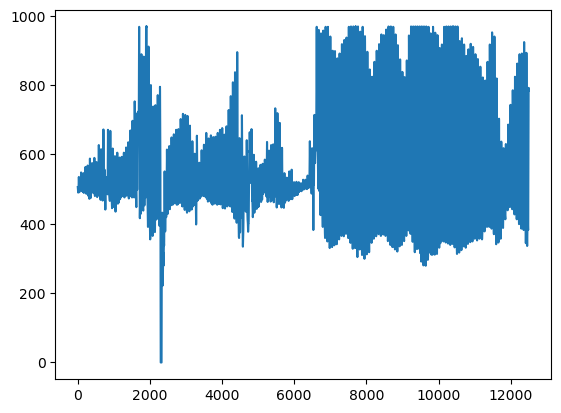

In [ ]:
plt.plot(all_data[:,-2])
plt.show()

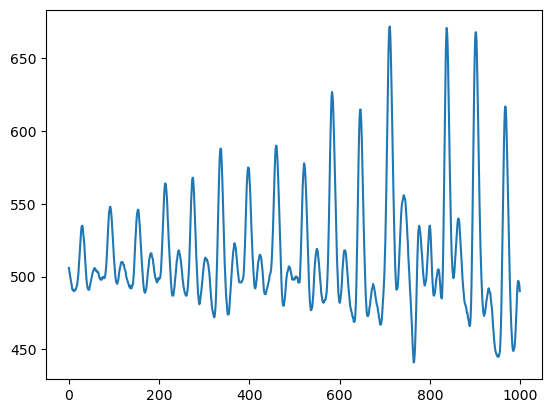

In [10]:
plt.plot(all_data[0:1000,-2])
plt.show()

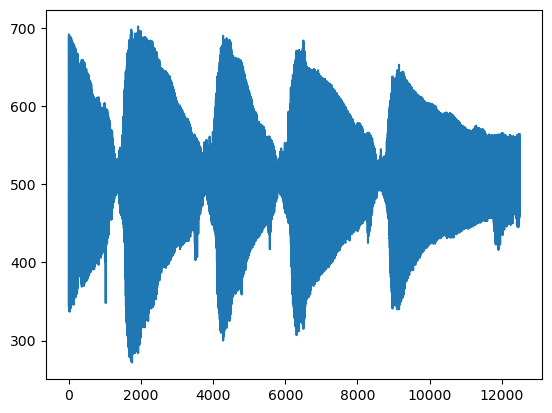

In [9]:
plt.plot(all_data[:,-1])
plt.show()

In [13]:
np.full(all_data.shape,all_data)

array([[  0,   1,   1, ...,   0, 506, 345],
       [  1,   1,   1, ...,   0, 504, 692],
       [  2,   1,   1, ...,   0, 502, 343],
       ...,
       [  1,   1,   1, ...,   0, 789, 561],
       [  2,   1,   1, ...,   0, 792, 461],
       [  3,   1,   1, ...,   0, 783, 564]])

In [14]:
# Turn BITalino led and buzzer on
device.trigger(digitalOutput_on)

In [ ]:
# Turn BITalino led and buzzer off
device.trigger(digitalOutput_off)

In [ ]:
# Stop acquisition
device.stop()

# Close connection
device.close()